# Python primer for HTMD

by [Gianni De Fabritiis](https://github.com/giadefa)

![](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)

## Basics

1. Downloaded and install HTMD from www.htmd.org.
2. HTMD uses Python 3 syntax.
3. This is a Python notebook (walk around)

In [1]:
a = 3+2
print('a is', a)

a is 5


## Python `import`

In Python, modules have to be imported in order to be used:

In [2]:
#import basic modules for interactive use
from htmd import *    
#Optional: set default plot to be inline
%matplotlib inline     
#Optional: autoreload module
%load_ext autoreload           
%autoreload 2

Please cite. HTMD: High-Throughput Molecular Dynamics for Molecular Discovery, J. Chem. Theory Comput., 2016, 12 (4), pp 1845-1852. http://pubs.acs.org/doi/abs/10.1021/acs.jctc.6b00049


You are on the latest HTMD version (unpackaged).


## Notebooks

* python is the interpreter
* ipython is an interactive interpreter
* A notebook like this one is a grapical interactive environment. 
* Use `print('variable')` to output variables on the screen.
* To navigate the filesystem (% indicates a notebook command)
```python
%ls
%mkdir test
```

## Interacting with the filesystem

Normal filesystem commands work from the interactive session but in a program the functional version should be used

In [3]:
os.chdir('.') 
os.listdir('.')
glob('python-*')

['python-primer.ipynb']

## Strings

Strings are identified by single or double apices like in 

In [4]:
b='newtest' 
c="newtest"

## Relational operators

Relational operators are `==`,`<`,`>`,`<=`,`>=`, and `!=`, and they can be connected with `and`,`or`,`not`

In [5]:
b == c

True

## Lists

Lists of different objects are created using  square brackets

In [6]:
d = [1, 2, 3, 'ba', 5, 6, 7, 8, 9]

## Getting Help

The command help provides help for a given function

In [7]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



## Arrays

Arrays are best created using `numpy` arrays

In [8]:
import numpy as np

In [9]:
m = np.array([[ 11., 12, 13, 14 ],
           [ 21, 22, 23, 24 ],
           [ 31, 32, 33, 34 ],
           [ 41, 42, 43, 44 ]])
print(m)

[[ 11.  12.  13.  14.]
 [ 21.  22.  23.  24.]
 [ 31.  32.  33.  34.]
 [ 41.  42.  43.  44.]]


where `m` is 4-by-4 matrix of double numbers, due to the fact than `11.` is a real number (notice the dot).

## Array multiplication

Arrays can be multiplied easily element by element

In [10]:
n = 3.0 * m
print(n)

[[  33.   36.   39.   42.]
 [  63.   66.   69.   72.]
 [  93.   96.   99.  102.]
 [ 123.  126.  129.  132.]]


A scalar multiplication is applied to each element of the array.

## Sequences

An array sequence can be created with ```arange```. Array indexing starts at 0.

In [11]:
o = np.arange(0,4)
print(o)

[0 1 2 3]


## Slicing

In [12]:
o[1:] #from 1 until the end, (starts at zero)

array([1, 2, 3])

In [13]:
m[:,0] = 99 # first column
m[-2:,]     # indexing backwards is possible

array([[ 99.,  32.,  33.,  34.],
       [ 99.,  42.,  43.,  44.]])

## Some matrix operations

In [14]:
np.multiply(m,o)

array([[   0.,   12.,   26.,   42.],
       [   0.,   22.,   46.,   72.],
       [   0.,   32.,   66.,  102.],
       [   0.,   42.,   86.,  132.]])

In [15]:
m.transpose()
np.inner(m,o)

array([  80.,  140.,  200.,  260.])

## Other operations

In [17]:
np.concatenate((o,o))

array([0, 1, 2, 3, 0, 1, 2, 3])

In [18]:
m.sum(axis=0)

array([ 396.,  108.,  112.,  116.])

In [19]:
print(o.shape)
print(o.size)
print(o.ndim)

(4,)
4
1


## Simple plots using `matplotlib`

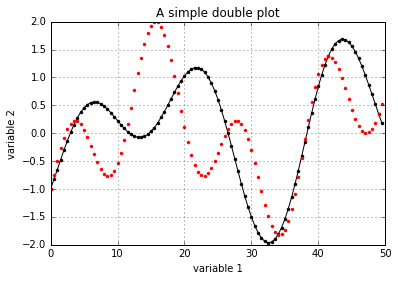

In [20]:
from matplotlib.pyplot import plot,title,xlabel,ylabel,grid,show,savefig
x = np.arange(0,50,.5)
y = np.sin(x/3) - np.cos(x/5)
plot(x,y, '.-k')
plot(x,np.sin(x/2) - np.cos(x/5),'.r')
title('A simple double plot')
xlabel('variable 1'), ylabel('variable 2'), grid(True)
show()

In [21]:
savefig('/tmp/foo.eps')

## Conditionals

In [22]:
if 1 > 0:
    d = 100
print(d)

100


As you probably know in python spaces are important. Use indentation to define a scope of the lines after the `:`

## Loops 

In [23]:
for i in np.arange(1,6):
    print(i)

1
2
3
4
5


## Functions

Subroutines are defined using `def`

In [24]:
def test(a, b=1, c=3):
    return a*b*c

In [25]:
test(1, c=5)

5

## Variables and Objects

* Python represents all its data as objects. 
* Variables are just names. 
* Some objects are mutable, some immutable.
 * Immutables are: int, float, complex, str, tuples, bytes, frozensets 
 * Mutables are: list, byte array, sets, dict, classes

## Identity of an object

With ```id``` it is possible to check the unique identity of an object

In [26]:
n = 1 # immutable integer
id(n)

139820739806880

In [27]:
n += 1
id(n) # new object

139820739806912

In [28]:
m = [1] # mutable list
id(m)

139820448972040

In [29]:
m.append(2)
id(m) # same object

139820448972040

## Argument passing

* Passing an argument to a function is like creating a new name to the object
* If it is mutable, then any change inside the function will affect the object outside. 
* If it is immutable and the function changes it, then python creates another object inside the function scope, so nothing changes outside of the function.

## Debugging code in notebooks

Really nice to debug an error and see what's wrong by inspecting variables using `%debug` (Press PgDown for example)

In [30]:
def broken_function(b):
    print(b,xxx())
c = 4
broken_function(c)

NameError: name 'xxx' is not defined

In [31]:
%debug

> <ipython-input-30-e92f54b12af9>(2)broken_function()
      1 def broken_function(b):
----> 2     print(b,xxx())
      3 c = 4
      4 broken_function(c)

ipdb> exit


## HTMD Documentation

* Embedded inside the code
* Available on www.htmd.org

## Exercises

1. Sum the first 50 numbers with a for loop
2. Do the same thing using `numpy` arrays
3. Write a function that set a value for its argument (that is an integer)
4. The same but for a `numpy` arrray